In [1]:
import numpy as np
import pandas as pd
import time
import math
import sys
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
import keras.callbacks
import matplotlib.pyplot as plt
from data_preprocessing import import_data
from utils import shuffle_in_unison
from utils import percent_correct
from utils import get_uniform_batch
print('Complete')

Using TensorFlow backend.


Complete


In [2]:

# Import the data as a dataframe
df = import_data()
# print('Dataframe shape:',df.shape)
print('Complete')

Complete


In [3]:

# Create test, validation, and training sets
test_df = pd.DataFrame()
valid_df = pd.DataFrame()
train_df = pd.DataFrame()

# take about 80% of the data for the training and validation sets
train_df_size_per_index = 370000    # about 64% of the data
valid_df_size_per_index = 100000    # about 16% of the data

#Shuffle the dataframe df
df = df.sample(frac=1)

# Put the first test_df_size into the test set
train_df = df[:train_df_size_per_index]
# Put the next valid_df_size into the validation set
valid_df = df[train_df_size_per_index:train_df_size_per_index+valid_df_size_per_index]
# Put the remainder into the training set
test_df = df[train_df_size_per_index+valid_df_size_per_index:]

# Extract the last columns, which corresponds to the labels
test_labels = test_df.iloc[:, -1]
valid_labels = valid_df.iloc[:, -1]
train_labels = train_df.iloc[:, -1]

# Remove the last columns, which corresponds to the labels
test_df = test_df.drop(test_df.columns[-1], axis=1)
valid_df = valid_df.drop(valid_df.columns[-1], axis=1)
train_df = train_df.drop(train_df.columns[-1], axis=1)

# Convert data from dataframes to np.arrays
test_data = test_df.values
valid_data = valid_df.values
train_data = train_df.values
test_labels = test_labels.values
valid_labels = valid_labels.values
train_labels = train_labels.values

# Convert labels to one hot vectors
test_labels = to_categorical(test_labels-1, 7)
valid_labels = to_categorical(valid_labels-1, 7)
train_labels = to_categorical(train_labels-1, 7)

# Shuffle the data and labels
shuffle_in_unison(test_data, test_labels)
shuffle_in_unison(valid_data, valid_labels)
shuffle_in_unison(train_data, train_labels)

print('Complete')

Complete


In [4]:
# Delete existing model
# del model

# Build the model
print('Build model...')
model = Sequential()
model.add(Dense(120, activation='relu', input_dim=54))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


optimizer = RMSprop(lr=0.05)
# model.compile(loss='mean_squared_error', optimizer=optimizer)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

print('Complete')

Build model...
Complete


In [5]:
num_epochs_trained = 0
train_loss = []
valid_loss = []
print('Complete')


Complete


In [6]:
def get_batch(data, labels, num=10000):
    """Gets a batch consisting of num (default 10000) samples randomly chosen with replacement
    from the input data and labels.
    """
    
    indices = np.random.choice(data.shape[0]-1, num)
    batch_data = data[indices, :]
    batch_labels = labels[indices, :]
    
    return batch_data, batch_labels

print('Complete.')

Complete.


Training for 1 minutes...
Epoch = 26, train_loss = 0.5693, valid_loss = 0.5552, epoch_time = 2.3s
Total time elapsed for this session = 1.0m


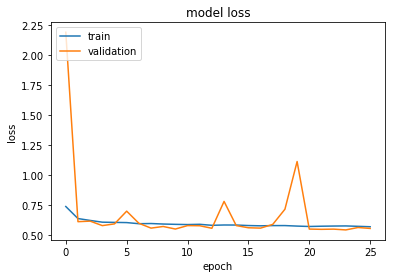

In [7]:
# train the model several epochs, and test on the validation set. Plot the loss for train and validation sets
# 8 epochs takes about a minute
t_init = time.time()
# for _ in np.arange(200):
train_time = 1 # how long to train for in minutes
print('Training for {} minutes...'.format(train_time))
while (time.time() - t_init)/60 < train_time:
    #print('Creating batch number', num_epochs_trained + 1, '...')
#     batch_data, batch_labels = get_batch(train_data,train_labels)
#     if num_epochs_trained%100 == 0:
#         print('Training on batch number', num_epochs_trained + 1, '...')
#     train_loss.append(model.train_on_batch(batch_data, batch_labels))
    t = time.time()
    history = model.fit(train_data, train_labels, batch_size=1000, epochs=1, verbose=0)
    train_loss.append(history.history['loss'])
    valid_loss.append(model.test_on_batch(valid_data, valid_labels, sample_weight=None))
    epoch_time = time.time() - t
    print('\b\b\b\rEpoch = {}, train_loss = {:0.4f}, valid_loss = {:0.4f}, epoch_time = {:0.1f}s'
          .format(num_epochs_trained+1, train_loss[-1][0], valid_loss[-1], epoch_time), end='')
    num_epochs_trained = num_epochs_trained + 1
total_time = time.time() - t_init

print('\nTotal time elapsed for this session = {:0.1f}m'.format(total_time/60))
# print('train_loss =', train_loss[-1], '    valid_loss =', valid_loss[-1])
# print('\nTotal number of epochs trained = {}'.format(num_epochs_trained))

# model.save('models/ground_cover_classifier_natural.h5')

plt.plot(train_loss)
plt.plot(valid_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('models/ground_cover_classifier_natural.h5')

In [8]:
percent_correct(model, train_data, train_labels)

Correct: 76.02027027027027 %


In [10]:
percent_correct(model, valid_data, valid_labels)

Correct: 76.123 %


In [14]:
test_loss = model.test_on_batch(test_data, test_labels, sample_weight=None)
print('test_loss=', test_loss)

test_loss= 0.557015


In [13]:
percent_correct(model, test_data, test_labels)

Correct: 76.31337152740244 %
